# week2 授業前課題4　ダーツ投げ問題

## 確率分布
- 一様分布  
全ての事象が等しい確率で起きる
- 離散確率分布  
地震や株価などデータ（事象）が離散的な場合の確率分布
- 連続確率分布  
データ（事象）が連続的な場合

In [1]:
# ディクショナリ
hist_worldcup = {"ブラジル":5, "ドイツ":4, "イタリア":4, "アルゼンチン":2, "フランス":2,"イングランド":1}

In [3]:
type(hist_worldcup.keys())

dict_keys

In [4]:
hist_worldcup.get("ブラジル")

5

In [5]:
for key, value in hist_worldcup.items():
    print(key, value)

ブラジル 5
ドイツ 4
イタリア 4
アルゼンチン 2
フランス 2
イングランド 1


## ダーツ投げのシュミレーションの作成
- 前提条件  

複数のダーツのまとは、間を空けずに横一列に並んでいるとします。<br>
ある番号のまとに狙ったダーツは、他のまとには行かないとします<br>
- 実装フロー　　

1.ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）<br>
2.サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）<br>
3.ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）<br>
4.1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）<br>
5.各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。<br>

### 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

In [6]:
import numpy as np

In [35]:
# choice()は要素を１つ、sample()は複数（重複なし）、choices()は複数（重複あり）
dice = [1, 2, 3, 4, 5, 6]
target_num = np.random.choice(dice)

### 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。<br>
正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 <br>
刺さった場所（座標）は、配列で保持するようにしてください。

In [36]:
# np.random.nomalで座標作成
# np.random.nomal(loc=平均,scale=標準偏差,size=出力サイズ)
point_ndarray = np.random.normal(loc=target_num, scale=0.1, size=1)
point_ndarray = np.append(point_ndarray, np.random.normal(loc=1, scale=0.1, size=1))
point_ndarray

array([5.13540032, 1.07202781])

In [74]:
# 二次元正規分布で座標作成
#　np.random.multivariate_normal(平均, 共分散行列,出力サイズ)
# 平均：x座標はサイコロ、yは1
mu = [target_num, 1]
# 共分散行列 xとyの分散と共分散が必要
# 標準偏差が0.1　標準偏差の二乗が分散0.01 共分散はxとyに関係がないように0とする
# [xの分散,共分散],[共分散,yの分散]
sigma= [[0.01, 0],[0, 0.01]]
point_mul = np.random.multivariate_normal(mu, sigma, 1)


## 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

In [49]:
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [123]:
def throw_dice():
    # サイコロの目を決める
    DICE = [1, 2, 3, 4, 5, 6]
    return np.random.choice(DICE)

def arrow_position(dice_num):
    # 二次元正規分布でx座標とy座標を返す（x座標はサイコロの目の影響をうける）
    mu = [dice_num, 1]
    sigma= [[0.01, 0],[0, 0.01]]
    return np.random.multivariate_normal(mu, sigma, 1)

dict_pos = defaultdict(list)
for i in range(1000):
    dice_num = throw_dice()
    pos_ndarray = arrow_position(dice_num)
    # キーが同じなら上書きしないで追加するようにする
    #print(dice_num)
    dict_pos[dice_num].append(pos_ndarray)


## 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。<br>
ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

(175, 1, 2)


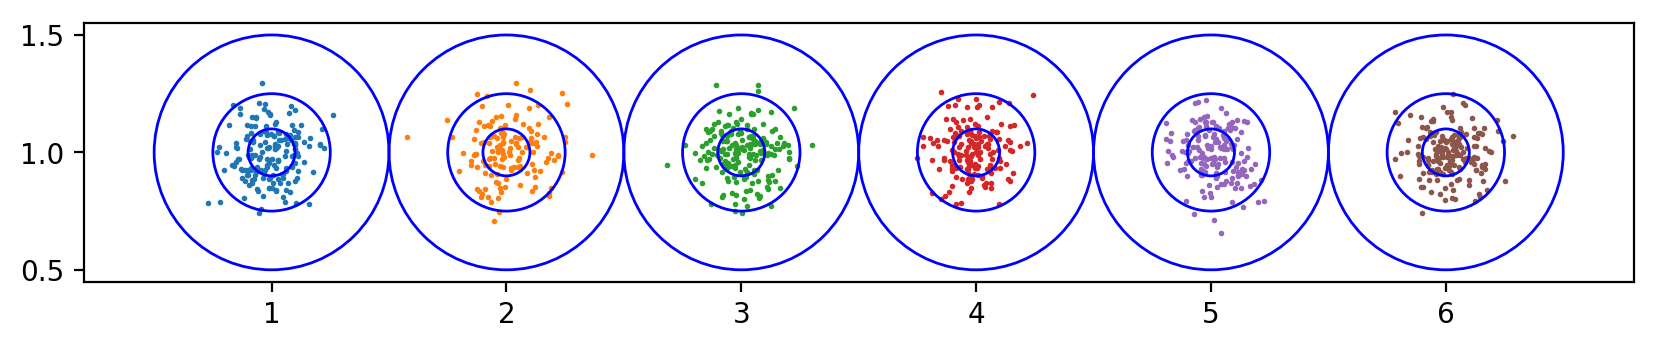

In [133]:
# グラフを拡大
fig = plt.figure(figsize=(10,10),dpi=200)
ax = plt.axes()

for i in range(1, 7):
    c = patches.Circle(xy=(i, 1), radius=0.1, fill=False, ec="b")
    ax.add_patch(c)
    c = patches.Circle(xy=(i, 1), radius=0.25, fill=False, ec="b")
    ax.add_patch(c)
    c = patches.Circle(xy=(i, 1), radius=0.5, fill=False, ec="b")
    ax.add_patch(c)
    xy_ndarray = np.array(dict_pos.get(i))
    # 指定したキーの中身が空だったらプロットしない
    if dict_pos.get(i) != None:
        # shapeが(175, 1, 2)などだった。（各回のデータ、arrayの親、xy座標）の順だったので下記のように指定
        # プロットの点が大きすぎたのでs=1に変更
        ax.scatter(xy_ndarray[:, :, 0], xy_ndarray[:, :, 1], s=1)

plt.axis("scaled")
ax.set_aspect('equal')
# xy_ndarray = np.array(dict_pos.get(1))
# print(xy_ndarray)
# print(xy_ndarray.shape)
# print(xy_ndarray[:, :, 0])
# print(xy_ndarray[:, :, 1])

## 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。<br>
ダーツの投げる回数とダーツのまとの数を関数の引数にしましょう。

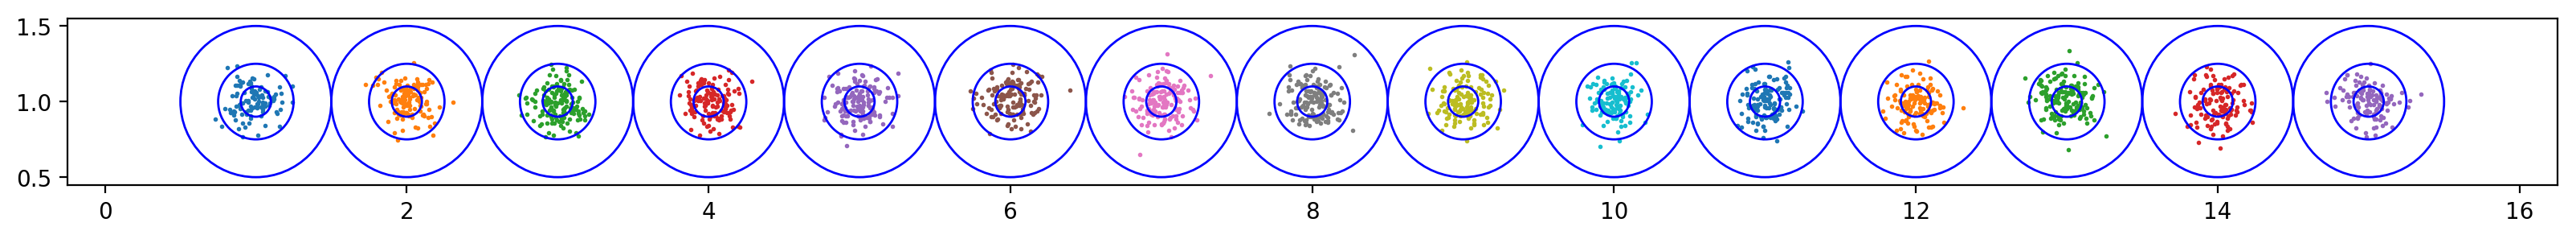

In [150]:
def random_num(target_number):
    # 的のNo.を決める
    return np.random.randint(1, target_number + 1)

def arrow_position(dice_num):
    # 二次元正規分布でx座標とy座標を返す（x座標はサイコロの目の影響をうける）
    mu = [dice_num, 1]
    sigma= [[0.01, 0],[0, 0.01]]
    return np.random.multivariate_normal(mu, sigma, 1)

def darts_simulation(throw_times, target_number):
    dict_pos = defaultdict(list)
    for i in range(throw_times):
        # 的のNo.を決める
        target_num = random_num(target_number)
        # 座標を決める
        pos_ndarray = arrow_position(target_num)
        # キーが同じなら上書きしないで追加するようにする
        #print(dice_num)
        dict_pos[target_num].append(pos_ndarray)
    
    #描画処理--------------
    # グラフを拡大
    fig = plt.figure(figsize=(20,20),dpi=200)
    ax = plt.axes()

    for i in range(1, target_number + 1):
        c = patches.Circle(xy=(i, 1), radius=0.1, fill=False, ec="b")
        ax.add_patch(c)
        c = patches.Circle(xy=(i, 1), radius=0.25, fill=False, ec="b")
        ax.add_patch(c)
        c = patches.Circle(xy=(i, 1), radius=0.5, fill=False, ec="b")
        ax.add_patch(c)
        xy_ndarray = np.array(dict_pos.get(i))
        # 指定したキーの中身が空だったらプロットしない
        if dict_pos.get(i) != None:
            # shapeが(175, 1, 2)などだった。（各回のデータ、arrayの親、xy座標）の順だったので下記のように指定
            # プロットの点が大きすぎたのでs=1に変更
            ax.scatter(xy_ndarray[:, :, 0], xy_ndarray[:, :, 1], s=1)

    plt.axis("scaled")
    ax.set_aspect('equal')

darts_simulation(2000, 15)